In [1]:
import ROOT

Welcome to JupyROOT 6.12/06


In [2]:
x = ROOT.RooRealVar("x","x",80,100)

mean = ROOT.RooRealVar("mean","mean",91,80,100)
sigma = ROOT.RooRealVar("sigma","sigma",1,0,10)
sig = ROOT.RooGaussian("sig","signal p.d.f.",x,mean,sigma)

coef0 = ROOT.RooRealVar("c0","coefficient #0",0.0,-1.,1)
coef1 = ROOT.RooRealVar("c1","coefficient #1",0.0,-1.,1)
coef2 = ROOT.RooRealVar("c2","coefficient #2",0.1,-1.,1)
bkg = ROOT.RooChebychev("bkg","background p.d.f.",x,ROOT.RooArgList(coef0,coef1,coef2))

fsig = ROOT.RooRealVar("fsig","signal fraction",0.5,0.,1.)

# model(x) = fsig*sig(x) + (1-fsig)*bkg(x)
model = ROOT.RooAddPdf("model","model",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



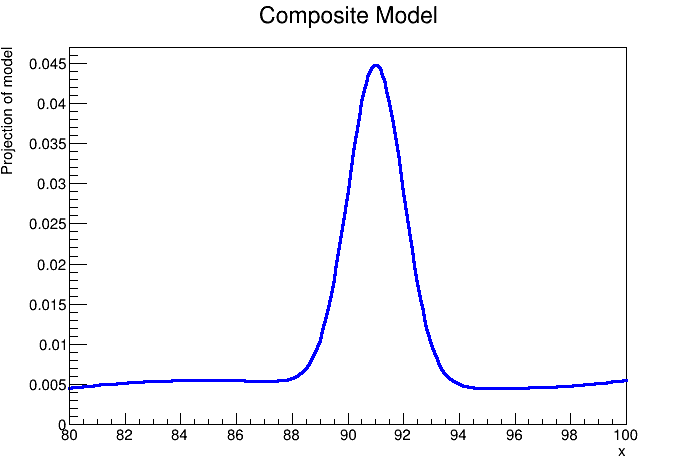

In [3]:
c1 = ROOT.TCanvas()
xframe = x.frame(ROOT.RooFit.Title("Composite Model"))
model.plotOn(xframe)
xframe.Draw()
c1.Draw()

In [4]:
data = model.generate(ROOT.RooArgSet(x),1000)
model.fitTo(data,ROOT.RooFit.PrintLevel(-1))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization


[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


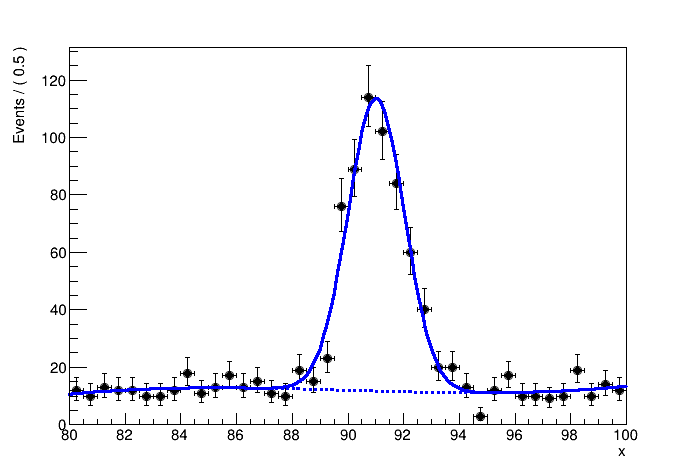

In [5]:
xframe = x.frame(ROOT.RooFit.Title(" "))
data.plotOn(xframe,ROOT.RooFit.Binning(40))
bkg_component = ROOT.RooArgSet(bkg)
model.plotOn(xframe,ROOT.RooFit.Components(bkg_component),ROOT.RooFit.LineStyle(2))
model.plotOn(xframe)
xframe.Draw()
c1.Draw()

In [6]:
x.setBins(40)
bkg_hist = bkg.generate(ROOT.RooArgSet(x),500)
sig_hist = sig.generate(ROOT.RooArgSet(x),500)

In [7]:
bkg_hist = bkg_hist.binnedClone()
sig_hist = sig_hist.binnedClone()
bkg_histpdf = ROOT.RooHistPdf("bkg","bkg",ROOT.RooArgSet(x),bkg_hist,0) 
sig_histpdf = ROOT.RooHistPdf("sig","sig",ROOT.RooArgSet(x),sig_hist,0) 

In [8]:
binned_model = ROOT.RooAddPdf("binned model","binned model",ROOT.RooArgList(sig_histpdf,bkg_histpdf),ROOT.RooArgList(fsig))

[#1] INFO:Plotting -- RooAbsPdf::plotOn(binned model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(binned model) indirectly selected PDF components: ()


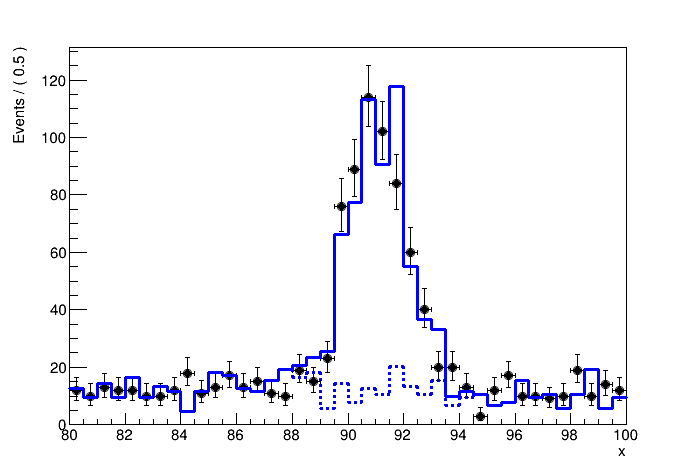

In [9]:
xframe = x.frame(ROOT.RooFit.Title(" "))
data.plotOn(xframe,ROOT.RooFit.Binning(40))
binned_model.plotOn(xframe)
bkg_component = ROOT.RooArgSet(bkg_histpdf)
binned_model.plotOn(xframe,ROOT.RooFit.Components(bkg_component),ROOT.RooFit.LineStyle(2))
xframe.Draw()
c1.Draw()

In [10]:
c1.SaveAs("../docs/source/stats-fig02.png")

Info in <TCanvas::Print>: png file ../docs/source/stats-fig02.png has been created
